## Course: PPP
## Project: Loan Status Classification
## D22017 P.Gowtham Kumar

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataframe = pd.read_csv('Loans - Training Data Set.csv')

In [3]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.00,< 1 year,Rent,46643.00,Debt Consolidation,777.39,18.00,10.00,12,0,6762,7946,0.00,0.00
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.00,10+ years,Home Mortgage,81099.00,Debt Consolidation,892.09,26.70,NaN,14,0,35706,77961,0.00,0.00
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.00,9 years,Home Mortgage,60438.00,Home Improvements,1244.02,16.70,32.00,11,1,11275,14815,1.00,0.00
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.00,3 years,Rent,34171.00,Debt Consolidation,990.94,10.00,NaN,21,0,7009,43533,0.00,0.00
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.00,10+ years,Home Mortgage,47003.00,Home Improvements,503.71,16.70,25.00,13,1,16913,19553,1.00,0.00


In [4]:
dataframe.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [6]:
train_df = dataframe

In [7]:
train_df.shape

(111107, 19)

In [8]:
train_df.duplicated().sum()

5869

In [9]:
train_df.drop_duplicates(inplace = True)

In [10]:
train_df.duplicated().sum()

0

In [11]:
train_df.shape

(105238, 19)

In [12]:
train_df.drop_duplicates(subset=["Loan ID"], keep='last', inplace=True)

In [13]:
train_df.shape

(88910, 19)

In [14]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('$',' ')

In [15]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('<','').str.replace('year','').str.strip()

In [16]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('s','').str.strip()

In [17]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('+','').str.strip()

In [18]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('-','').str.strip()

In [19]:
train_df['Credit Score'] = train_df['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

In [20]:
train_df['Home Ownership'].replace({'HaveMortgage': 'Home Mortgage'}, inplace =True)

In [21]:
train_df['Purpose'].replace({'other': 'Other'}, inplace =True)

In [22]:
#train_df['Years in current_job'] = train_df['Years in current job'].astype(object)

In [23]:
train_df['Monthly Debt'] = train_df['Monthly Debt'].str.replace('$',' ')

In [24]:
train_df['Monthly Debt'] = train_df['Monthly Debt'].astype(float)

In [25]:
train_df['Maximum Open Credit'] = pd.to_numeric(train_df['Maximum Open Credit'], errors='coerce')

In [26]:
train_df['Maximum Open Credit'] = train_df['Maximum Open Credit'].astype(float)

In [27]:
train_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,728.00,1,Rent,46643.00,Debt Consolidation,777.39,18.00,10.00,12,0,6762,7946.00,0.00,0.00
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,733.00,10,Home Mortgage,81099.00,Debt Consolidation,892.09,26.70,NaN,14,0,35706,77961.00,0.00,0.00
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,724.00,9,Home Mortgage,60438.00,Home Improvements,1244.02,16.70,32.00,11,1,11275,14815.00,1.00,0.00
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,740.00,3,Rent,34171.00,Debt Consolidation,990.94,10.00,NaN,21,0,7009,43533.00,0.00,0.00
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,686.00,10,Home Mortgage,47003.00,Home Improvements,503.71,16.70,25.00,13,1,16913,19553.00,1.00,0.00


In [28]:
train_df.duplicated().sum()

0

In [29]:
train_df.shape

(88910, 19)

In [30]:
dataframe.drop(columns=['Loan ID','Customer ID'],axis=1, inplace=True )

In [31]:
cat_data = ['Loan Status','Term','Home Ownership','Purpose']


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [33]:
for col in cat_data:
    train_df[col]=le.fit_transform(train_df[col])
    print(le.classes_)

['Charged Off' 'Fully Paid']
['Long Term' 'Short Term']
['Home Mortgage' 'Own Home' 'Rent']
['Business Loan' 'Buy House' 'Buy a Car' 'Debt Consolidation'
 'Educational Expenses' 'Home Improvements' 'Medical Bills' 'Other'
 'Take a Trip' 'major_purchase' 'moving' 'renewable_energy'
 'small_business' 'vacation' 'wedding']


In [34]:
train_df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,12232,1,728.00,1,2,46643.00,3,777.39,18.00,10.00,12,0,6762,7946.00,0.00,0.00
1,0,25014,0,733.00,10,0,81099.00,3,892.09,26.70,NaN,14,0,35706,77961.00,0.00,0.00
2,0,16117,1,724.00,9,0,60438.00,5,1244.02,16.70,32.00,11,1,11275,14815.00,1.00,0.00
3,0,11716,1,740.00,3,2,34171.00,3,990.94,10.00,NaN,21,0,7009,43533.00,0.00,0.00
4,0,9789,0,686.00,10,0,47003.00,5,503.71,16.70,25.00,13,1,16913,19553.00,1.00,0.00


In [35]:
train_df.shape

(88910, 17)

In [36]:
from sklearn.impute import KNNImputer
import pandas as pd

# Create a sample DataFrame with missing values
df = train_df
# Create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=2)

# Fit and transform the DataFrame to impute missing values
df_imputed = imputer.fit_transform(df)

In [37]:
df_imputed = pd.DataFrame(df_imputed)

In [38]:
df_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00,12232.00,1.00,728.00,1.00,2.00,46643.00,3.00,777.39,18.00,10.00,12.00,0.00,6762.00,7946.00,0.00,0.00
1,0.00,25014.00,0.00,733.00,10.00,0.00,81099.00,3.00,892.09,26.70,48.50,14.00,0.00,35706.00,77961.00,0.00,0.00
2,0.00,16117.00,1.00,724.00,9.00,0.00,60438.00,5.00,1244.02,16.70,32.00,11.00,1.00,11275.00,14815.00,1.00,0.00
3,0.00,11716.00,1.00,740.00,3.00,2.00,34171.00,3.00,990.94,10.00,57.50,21.00,0.00,7009.00,43533.00,0.00,0.00
4,0.00,9789.00,0.00,686.00,10.00,0.00,47003.00,5.00,503.71,16.70,25.00,13.00,1.00,16913.00,19553.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,1.00,15654.00,0.00,686.00,10.00,2.00,43050.00,3.00,1112.25,14.10,49.00,18.00,0.00,14730.00,29757.00,0.00,0.00
88906,1.00,15237.00,1.00,706.00,10.00,0.00,60948.00,3.00,1439.69,15.90,48.00,11.00,0.00,17733.00,23060.00,0.00,0.00
88907,1.00,10413.00,1.00,719.00,5.00,0.00,66945.00,3.00,839.58,8.70,28.50,11.00,0.00,5205.00,6348.00,0.00,0.00
88908,1.00,34447.00,1.00,626.00,10.00,0.00,78736.00,3.00,2010.19,30.40,9.00,12.00,0.00,32318.00,37580.00,0.00,0.00


In [39]:
df_imputed.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [40]:
df_imputed = df_imputed.rename(columns={0: 'Loan Status'})

In [41]:
df_imputed

,Loan Status,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00,12232.00,1.00,728.00,1.00,2.00,46643.00,3.00,777.39,18.00,10.00,12.00,0.00,6762.00,7946.00,0.00,0.00
1,0.00,25014.00,0.00,733.00,10.00,0.00,81099.00,3.00,892.09,26.70,48.50,14.00,0.00,35706.00,77961.00,0.00,0.00
2,0.00,16117.00,1.00,724.00,9.00,0.00,60438.00,5.00,1244.02,16.70,32.00,11.00,1.00,11275.00,14815.00,1.00,0.00
3,0.00,11716.00,1.00,740.00,3.00,2.00,34171.00,3.00,990.94,10.00,57.50,21.00,0.00,7009.00,43533.00,0.00,0.00
4,0.00,9789.00,0.00,686.00,10.00,0.00,47003.00,5.00,503.71,16.70,25.00,13.00,1.00,16913.00,19553.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,1.00,15654.00,0.00,686.00,10.00,2.00,43050.00,3.00,1112.25,14.10,49.00,18.00,0.00,14730.00,29757.00,0.00,0.00
88906,1.00,15237.00,1.00,706.00,10.00,0.00,60948.00,3.00,1439.69,15.90,48.00,11.00,0.00,17733.00,23060.00,0.00,0.00
88907,1.00,10413.00,1.00,719.00,5.00,0.00,66945.00,3.00,839.58,8.70,28.50,11.00,0.00,5205.00,6348.00,0.00,0.00
88908,1.00,34447.00,1.00,626.00,10.00,0.00,78736.00,3.00,2010.19,30.40,9.00,12.00,0.00,32318.00,37580.00,0.00,0.00


In [42]:
df_imputed = df_imputed.rename(columns={1:'Current_Loan_Amount',2:'Term',3:'Credit_Score',4:'Years_in_current_job',5:'Home_Ownership',
                       6:'Annual_Income',7:'Purpose',8:'Monthly Debt',9:'Years_of_Credit_History',
                       10:'Months_since_last_delinquent',11:'Number_of_Open_Accounts',12:'Number_of_Credit_Problems',
                      13:'Current_Credit_Balance',14:'Maximum_Open_Credit',15:'Bankruptcies',16:'Tax Liens'})

In [43]:
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens
0,0.00,12232.00,1.00,728.00,1.00,2.00,46643.00,3.00,777.39,18.00,10.00,12.00,0.00,6762.00,7946.00,0.00,0.00
1,0.00,25014.00,0.00,733.00,10.00,0.00,81099.00,3.00,892.09,26.70,48.50,14.00,0.00,35706.00,77961.00,0.00,0.00
2,0.00,16117.00,1.00,724.00,9.00,0.00,60438.00,5.00,1244.02,16.70,32.00,11.00,1.00,11275.00,14815.00,1.00,0.00
3,0.00,11716.00,1.00,740.00,3.00,2.00,34171.00,3.00,990.94,10.00,57.50,21.00,0.00,7009.00,43533.00,0.00,0.00
4,0.00,9789.00,0.00,686.00,10.00,0.00,47003.00,5.00,503.71,16.70,25.00,13.00,1.00,16913.00,19553.00,1.00,0.00


In [44]:
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

<AxesSubplot:title={'center':'Number of loans in terms of Credit Score category'}>

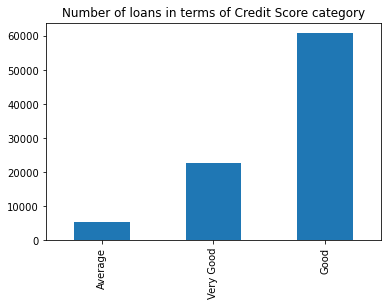

In [45]:
df_imputed['Credit_Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')

In [46]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Credit_Score'], drop_first = True))
df_imputed.rename(index = str, columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'})
df_imputed = df_imputed.drop(['Credit_Score'], axis=1);

In [47]:
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens,Good,Very Good
0,0.00,12232.00,1.00,1.00,2.00,46643.00,3.00,777.39,18.00,10.00,12.00,0.00,6762.00,7946.00,0.00,0.00,1,0
1,0.00,25014.00,0.00,10.00,0.00,81099.00,3.00,892.09,26.70,48.50,14.00,0.00,35706.00,77961.00,0.00,0.00,1,0
2,0.00,16117.00,1.00,9.00,0.00,60438.00,5.00,1244.02,16.70,32.00,11.00,1.00,11275.00,14815.00,1.00,0.00,1,0
3,0.00,11716.00,1.00,3.00,2.00,34171.00,3.00,990.94,10.00,57.50,21.00,0.00,7009.00,43533.00,0.00,0.00,0,1
4,0.00,9789.00,0.00,10.00,0.00,47003.00,5.00,503.71,16.70,25.00,13.00,1.00,16913.00,19553.00,1.00,0.00,1,0


In [48]:
df_imputed['Employment History'] = df_imputed['Years_in_current_job'].apply(lambda x: "Emp Level Jr." if x<4 else ("Emp Level Mid" if x>4 and x<8 else "Emp Senior"))
df_imputed = df_imputed.drop(['Years_in_current_job'], axis=1)
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Employment History'],drop_first = True))
df_imputed = df_imputed.drop(['Employment History'], axis=1)

In [49]:
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens,Good,Very Good,Emp Level Mid,Emp Senior
0,0.00,12232.00,1.00,2.00,46643.00,3.00,777.39,18.00,10.00,12.00,0.00,6762.00,7946.00,0.00,0.00,1,0,0,0
1,0.00,25014.00,0.00,0.00,81099.00,3.00,892.09,26.70,48.50,14.00,0.00,35706.00,77961.00,0.00,0.00,1,0,0,1
2,0.00,16117.00,1.00,0.00,60438.00,5.00,1244.02,16.70,32.00,11.00,1.00,11275.00,14815.00,1.00,0.00,1,0,0,1
3,0.00,11716.00,1.00,2.00,34171.00,3.00,990.94,10.00,57.50,21.00,0.00,7009.00,43533.00,0.00,0.00,0,1,0,0
4,0.00,9789.00,0.00,0.00,47003.00,5.00,503.71,16.70,25.00,13.00,1.00,16913.00,19553.00,1.00,0.00,1,0,0,1


<AxesSubplot:title={'center':'Loans vs Credit problems of Loanee'}>

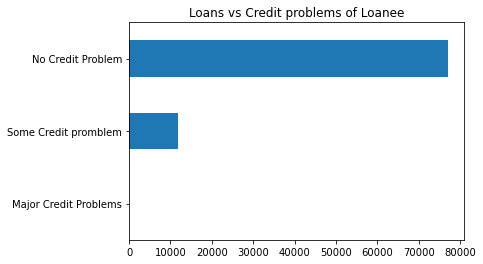

In [50]:
df_imputed['Credit Problems'] = df_imputed['Number_of_Credit_Problems'].apply(lambda x: "No Credit Problem" if x==0 else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))
df_imputed['Credit Problems'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Loans vs Credit problems of Loanee")

In [51]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Credit Problems'],drop_first = True))
df_imputed = df_imputed.drop(['Credit Problems','Number_of_Credit_Problems'], axis=1)

In [52]:
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens,Good,Very Good,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem
0,0.00,12232.00,1.00,2.00,46643.00,3.00,777.39,18.00,10.00,12.00,6762.00,7946.00,0.00,0.00,1,0,0,0,1,0
1,0.00,25014.00,0.00,0.00,81099.00,3.00,892.09,26.70,48.50,14.00,35706.00,77961.00,0.00,0.00,1,0,0,1,1,0
2,0.00,16117.00,1.00,0.00,60438.00,5.00,1244.02,16.70,32.00,11.00,11275.00,14815.00,1.00,0.00,1,0,0,1,0,1
3,0.00,11716.00,1.00,2.00,34171.00,3.00,990.94,10.00,57.50,21.00,7009.00,43533.00,0.00,0.00,0,1,0,0,1,0
4,0.00,9789.00,0.00,0.00,47003.00,5.00,503.71,16.70,25.00,13.00,16913.00,19553.00,1.00,0.00,1,0,0,1,0,1


In [53]:
df_imputed['Credit Age'] = df_imputed['Years_of_Credit_History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [54]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Credit Age'],drop_first = True))
df_imputed = df_imputed.drop(['Credit Age','Years_of_Credit_History'], axis =1)
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,...,Bankruptcies,Tax Liens,Good,Very Good,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age
0,0.00,12232.00,1.00,2.00,46643.00,3.00,777.39,10.00,12.00,6762.00,...,0.00,0.00,1,0,0,0,1,0,0,0
1,0.00,25014.00,0.00,0.00,81099.00,3.00,892.09,48.50,14.00,35706.00,...,0.00,0.00,1,0,0,1,1,0,0,0
2,0.00,16117.00,1.00,0.00,60438.00,5.00,1244.02,32.00,11.00,11275.00,...,1.00,0.00,1,0,0,1,0,1,1,0
3,0.00,11716.00,1.00,2.00,34171.00,3.00,990.94,57.50,21.00,7009.00,...,0.00,0.00,0,1,0,0,1,0,1,0
4,0.00,9789.00,0.00,0.00,47003.00,5.00,503.71,25.00,13.00,16913.00,...,1.00,0.00,1,0,0,1,0,1,1,0


In [55]:
meanxoutlier = df_imputed[df_imputed['Annual_Income'] < 99999999.00 ]['Annual_Income'].mean()
stddevxoutlier = df_imputed[df_imputed['Annual_Income'] < 99999999.00 ]['Annual_Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [56]:
df_imputed['Annual_Income'] = df_imputed['Annual_Income'].apply(lambda x: "Low Income" if x<=poorline else ("Average Income" if x>poorline and x<richline else "High Income"))
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Annual_Income'],drop_first = True))
df_imputed = df_imputed.drop(['Annual_Income'], axis=1)
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,...,Good,Very Good,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,High Income,Low Income
0,0.00,12232.00,1.00,2.00,3.00,777.39,10.00,12.00,6762.00,7946.00,...,1,0,0,0,1,0,0,0,0,0
1,0.00,25014.00,0.00,0.00,3.00,892.09,48.50,14.00,35706.00,77961.00,...,1,0,0,1,1,0,0,0,0,0
2,0.00,16117.00,1.00,0.00,5.00,1244.02,32.00,11.00,11275.00,14815.00,...,1,0,0,1,0,1,1,0,0,0
3,0.00,11716.00,1.00,2.00,3.00,990.94,57.50,21.00,7009.00,43533.00,...,0,1,0,0,1,0,1,0,0,0
4,0.00,9789.00,0.00,0.00,5.00,503.71,25.00,13.00,16913.00,19553.00,...,1,0,0,1,0,1,1,0,0,0


In [57]:
lmeanxoutlier = df_imputed[df_imputed['Current_Loan_Amount'] < 99999999.00 ]['Current_Loan_Amount'].mean()
lstddevxoutlier = df_imputed[df_imputed['Current_Loan_Amount'] < 99999999.00 ]['Current_Loan_Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)
df_imputed['Current_Loan_Amount'] = df_imputed['Current_Loan_Amount'].apply(lambda x: "Small Loan" if x<=lowrange else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

5692.120119456364 22276.036889750278


In [58]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Current_Loan_Amount'],drop_first = True))
df_imputed = df_imputed.drop(['Current_Loan_Amount'], axis=1)

In [59]:
df_imputed.head()

,Loan Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,...,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan
0,0.00,1.00,2.00,3.00,777.39,10.00,12.00,6762.00,7946.00,0.00,...,0,0,1,0,0,0,0,0,1,0
1,0.00,0.00,0.00,3.00,892.09,48.50,14.00,35706.00,77961.00,0.00,...,0,1,1,0,0,0,0,0,0,0
2,0.00,1.00,0.00,5.00,1244.02,32.00,11.00,11275.00,14815.00,1.00,...,0,1,0,1,1,0,0,0,1,0
3,0.00,1.00,2.00,3.00,990.94,57.50,21.00,7009.00,43533.00,0.00,...,0,0,1,0,1,0,0,0,1,0
4,0.00,0.00,0.00,5.00,503.71,25.00,13.00,16913.00,19553.00,1.00,...,0,1,0,1,1,0,0,0,1,0


In [60]:
df_imputed.columns

Index(['Loan Status', 'Term', 'Home_Ownership', 'Purpose', 'Monthly Debt',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax Liens', 'Good', 'Very Good', 'Emp Level Mid', 'Emp Senior',
       'No Credit Problem', 'Some Credit promblem', 'Good Credit Age',
       'Short Credit Age', 'High Income', 'Low Income', 'Medium Loan',
       'Small Loan'],
      dtype='object')

In [61]:
df_imputed['Tax Liens'] = df_imputed['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))
df_imputed= df_imputed.join(pd.get_dummies(df_imputed['Tax Liens'],drop_first = True))
df_imputed= df_imputed.drop(['Tax Liens'],axis=1)

In [62]:
df_imputed.head()

,Loan Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,...,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens
0,0.00,1.00,2.00,3.00,777.39,10.00,12.00,6762.00,7946.00,0.00,...,1,0,0,0,0,0,1,0,1,0
1,0.00,0.00,0.00,3.00,892.09,48.50,14.00,35706.00,77961.00,0.00,...,1,0,0,0,0,0,0,0,1,0
2,0.00,1.00,0.00,5.00,1244.02,32.00,11.00,11275.00,14815.00,1.00,...,0,1,1,0,0,0,1,0,1,0
3,0.00,1.00,2.00,3.00,990.94,57.50,21.00,7009.00,43533.00,0.00,...,1,0,1,0,0,0,1,0,1,0
4,0.00,0.00,0.00,5.00,503.71,25.00,13.00,16913.00,19553.00,1.00,...,0,1,1,0,0,0,1,0,1,0


In [63]:
df_imputed['Bankruptcies'] = df_imputed['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))
df_imputed= df_imputed.join(pd.get_dummies(df_imputed['Bankruptcies'],drop_first = True))
df_imputed= df_imputed.drop(['Bankruptcies'],axis=1)
df_imputed.head()

,Loan Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,...,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,0.00,1.00,2.00,3.00,777.39,10.00,12.00,6762.00,7946.00,1,...,0,0,0,0,1,0,1,0,1,0
1,0.00,0.00,0.00,3.00,892.09,48.50,14.00,35706.00,77961.00,1,...,0,0,0,0,0,0,1,0,1,0
2,0.00,1.00,0.00,5.00,1244.02,32.00,11.00,11275.00,14815.00,1,...,1,0,0,0,1,0,1,0,0,1
3,0.00,1.00,2.00,3.00,990.94,57.50,21.00,7009.00,43533.00,0,...,1,0,0,0,1,0,1,0,1,0
4,0.00,0.00,0.00,5.00,503.71,25.00,13.00,16913.00,19553.00,1,...,1,0,0,0,1,0,1,0,0,1


In [64]:
df_imputed_wosc = df_imputed

In [65]:
y = df_imputed_wosc['Loan Status']
X = df_imputed_wosc.drop(['Loan Status'],axis=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
lregclassifier = LogisticRegression()
lregclassifier.fit(X_train,y_train)
lregprediction = lregclassifier.predict(X_test)
print("Score: ",lregclassifier.score(X_test, y_test))

Score:  0.7128932210899424


In [68]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, lregprediction).ravel()
print(tneg,fpos,fneg,tpos)

0 8420 4 20917


F1 score:  0.8345785817276183
AUC:  0.5261126486799507


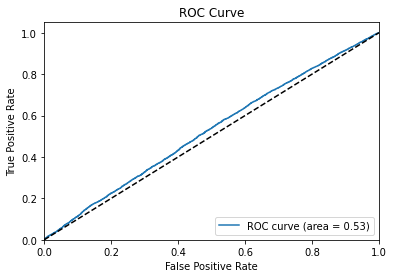

In [69]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('your_dataset.csv')

# Select the feature columns and target column
y = df_imputed_wosc['Loan Status']
X = df_imputed_wosc.drop(['Loan Status'],axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)

# Calculate AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

F1 score:  0.7353302916088078
AUC:  0.5465225933935961


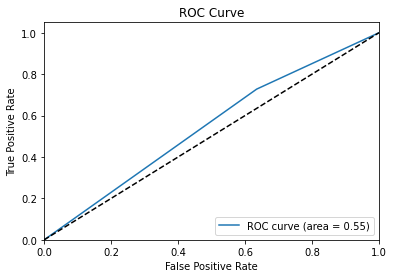

In [70]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('your_dataset.csv')

# Select the feature columns and target column
y = df_imputed_wosc['Loan Status']
X = df_imputed_wosc.drop(['Loan Status'],axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)

# Calculate AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [71]:
df_imputed_wsc = df_imputed

In [72]:
y = df_imputed_wsc['Loan Status']
X = df_imputed_wsc.drop(['Loan Status'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(X_train)
x_test = ro_scaler.fit_transform(X_test)

In [74]:
lr = LogisticRegression()

In [75]:
lr.fit(x_train , y_train)

LogisticRegression()

In [76]:
print(lr.score(x_train , y_train))
print(lr.score(x_test , y_test))

0.7164407828140816
0.7169609717692048


In [77]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)

AUC:  0.5465225933935961


### SMOTE

In [78]:
df_smote = df_imputed

In [79]:
df_smote

,Loan Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,...,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,0.00,1.00,2.00,3.00,777.39,10.00,12.00,6762.00,7946.00,1,...,0,0,0,0,1,0,1,0,1,0
1,0.00,0.00,0.00,3.00,892.09,48.50,14.00,35706.00,77961.00,1,...,0,0,0,0,0,0,1,0,1,0
2,0.00,1.00,0.00,5.00,1244.02,32.00,11.00,11275.00,14815.00,1,...,1,0,0,0,1,0,1,0,0,1
3,0.00,1.00,2.00,3.00,990.94,57.50,21.00,7009.00,43533.00,0,...,1,0,0,0,1,0,1,0,1,0
4,0.00,0.00,0.00,5.00,503.71,25.00,13.00,16913.00,19553.00,1,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,1.00,0.00,2.00,3.00,1112.25,49.00,18.00,14730.00,29757.00,1,...,1,0,0,0,1,0,1,0,1,0
88906,1.00,1.00,0.00,3.00,1439.69,48.00,11.00,17733.00,23060.00,1,...,1,0,0,0,1,0,1,0,1,0
88907,1.00,1.00,0.00,3.00,839.58,28.50,11.00,5205.00,6348.00,1,...,1,0,0,0,1,0,1,0,1,0
88908,1.00,1.00,0.00,3.00,2010.19,9.00,12.00,32318.00,37580.00,0,...,0,0,0,0,0,0,1,0,1,0


In [80]:
df_smote = df_smote.rename(columns={'Loan Status': 'Loan_Status'})

### Resampling
- A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

63737
25173


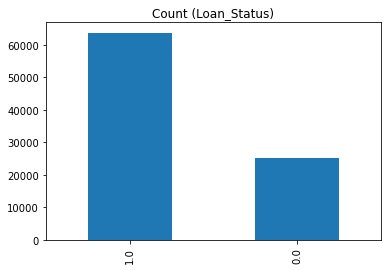

In [81]:
# Class count
count_class_0, count_class_1 = df_smote.Loan_Status.value_counts()
print(count_class_0)
print(count_class_1)
df_smote.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)');

In [82]:
# Divide by class
df_class_0 = df_smote[df_smote['Loan_Status'] == 1]
df_class_1 = df_smote[df_smote['Loan_Status'] == 0]
df_class_0

,Loan_Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,...,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
5044,1.00,1.00,0.00,5.00,1295.26,33.00,16.00,427.00,8542.00,1,...,1,0,0,0,0,0,1,0,1,0
5045,1.00,1.00,2.00,3.00,626.12,38.00,7.00,742.00,9166.00,0,...,1,0,0,0,0,0,1,0,1,0
5046,1.00,1.00,0.00,3.00,683.34,10.00,12.00,10835.00,18028.00,1,...,0,0,0,0,0,0,1,0,1,0
5047,1.00,1.00,1.00,3.00,1300.41,45.00,14.00,22746.00,42835.00,0,...,1,0,0,0,0,0,1,0,1,0
5048,1.00,1.00,0.00,5.00,536.50,59.00,11.00,762.00,1963.00,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,1.00,0.00,2.00,3.00,1112.25,49.00,18.00,14730.00,29757.00,1,...,1,0,0,0,1,0,1,0,1,0
88906,1.00,1.00,0.00,3.00,1439.69,48.00,11.00,17733.00,23060.00,1,...,1,0,0,0,1,0,1,0,1,0
88907,1.00,1.00,0.00,3.00,839.58,28.50,11.00,5205.00,6348.00,1,...,1,0,0,0,1,0,1,0,1,0
88908,1.00,1.00,0.00,3.00,2010.19,9.00,12.00,32318.00,37580.00,0,...,0,0,0,0,0,0,1,0,1,0


## Random over-sampling


Random over-sampling:
1.00    63737
0.00    63737
Name: Loan_Status, dtype: int64


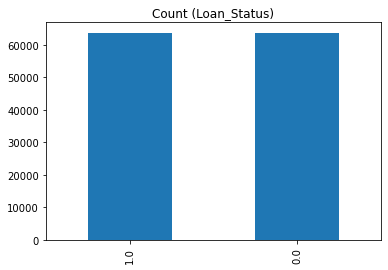

In [83]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Loan_Status.value_counts())

df_test_over.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)');

### Random under-sampling


Random under-sampling:
1.00    25173
0.00    25173
Name: Loan_Status, dtype: int64


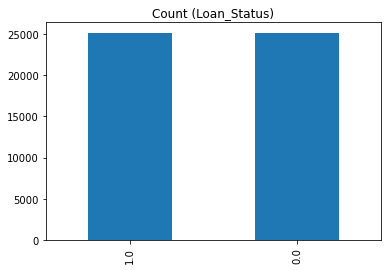

In [84]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Loan_Status.value_counts())

df_test_under.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)');

### Over-sampling: SMOTE
- SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

In [85]:
x1 = df_smote.drop(['Loan_Status'], axis=1)
y1 = df_smote['Loan_Status']
df_smote

,Loan_Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,...,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,0.00,1.00,2.00,3.00,777.39,10.00,12.00,6762.00,7946.00,1,...,0,0,0,0,1,0,1,0,1,0
1,0.00,0.00,0.00,3.00,892.09,48.50,14.00,35706.00,77961.00,1,...,0,0,0,0,0,0,1,0,1,0
2,0.00,1.00,0.00,5.00,1244.02,32.00,11.00,11275.00,14815.00,1,...,1,0,0,0,1,0,1,0,0,1
3,0.00,1.00,2.00,3.00,990.94,57.50,21.00,7009.00,43533.00,0,...,1,0,0,0,1,0,1,0,1,0
4,0.00,0.00,0.00,5.00,503.71,25.00,13.00,16913.00,19553.00,1,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,1.00,0.00,2.00,3.00,1112.25,49.00,18.00,14730.00,29757.00,1,...,1,0,0,0,1,0,1,0,1,0
88906,1.00,1.00,0.00,3.00,1439.69,48.00,11.00,17733.00,23060.00,1,...,1,0,0,0,1,0,1,0,1,0
88907,1.00,1.00,0.00,3.00,839.58,28.50,11.00,5205.00,6348.00,1,...,1,0,0,0,1,0,1,0,1,0
88908,1.00,1.00,0.00,3.00,2010.19,9.00,12.00,32318.00,37580.00,0,...,0,0,0,0,0,0,1,0,1,0


In [86]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [87]:
import imblearn

In [88]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'minority')
X_sm, y_sm = smote.fit_resample(x1, y1)

In [89]:
y_sm.value_counts()

0.00    63737
1.00    63737
Name: Loan_Status, dtype: int64

### Over-sampling followed by under-sampling
- Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [90]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt1, y_smt1 = smt.fit_resample(x1, y1)

In [91]:
y_smt1.value_counts()

0.00    57847
1.00    57847
Name: Loan_Status, dtype: int64

- #### i will try random forest after SMOTE()

In [92]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_smt1,y_smt1, test_size=0.2,random_state= 42)
rf = RandomForestClassifier(n_estimators=100 ,max_features=6 ,    max_depth=8)

rf.fit(X_train , y_train)
print(rf.score(X_train , y_train))
print(rf.score(X_test , y_test))

0.7722435308735347
0.7663684688188772


In [93]:
Y_pred =rf.predict(X_test)

Confusion matrix:
 [[7743 3762]
 [1644 9990]]


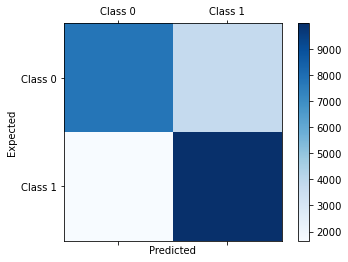

In [94]:
conf_mat1 = confusion_matrix(y_true=y_test, y_pred=Y_pred)
print('Confusion matrix:\n', conf_mat1)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat1, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [95]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)

AUC:  0.842933885955363


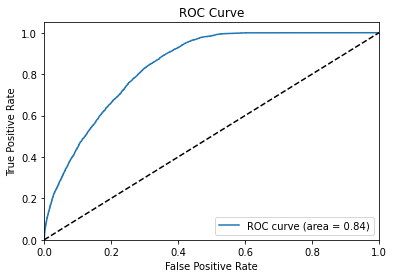

In [96]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [97]:
y_test.shape

(23139,)

In [98]:
X_test.shape

(23139, 24)

In [99]:
Y_pred.shape

(23139,)

In [100]:
# Calculate F1 score
f1 = f1_score(y_test, Y_pred)
print("F1 score: ", f1)

F1 score:  0.7870479792011345


F1-score: 0.784
AUC: 0.836


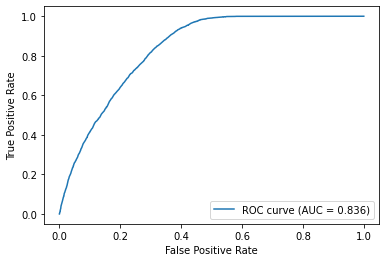

In [101]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
#df = pd.read_csv("path/to/your/dataset.csv")

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smt1,y_smt1, test_size=0.2,random_state= 42)

# create an instance of the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# calculate the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: {:.3f}".format(f1))

# calculate the AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: {:.3f}".format(auc))

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.3f})".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

In [103]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


F1-score: 0.827
AUC: 0.871


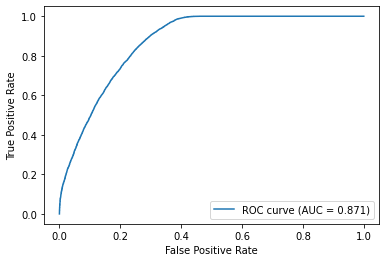

In [104]:
import xgboost as xgb
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
#df = pd.read_csv("path/to/your/dataset.csv")

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smt1,y_smt1, test_size=0.2,random_state= 42)

# create an instance of the XGBClassifier
clf = xgb.XGBClassifier(n_estimators=50, random_state=42)

# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# calculate the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: {:.3f}".format(f1))

# calculate the AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: {:.3f}".format(auc))

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.3f})".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

- ### WE CAN SEE NOW OUR MODEL IS DOING BETTER PERFORMANCE ( COZ WE HAVE BALANCED CLASSES)